# Import and Export by India from 2014 to 2017

To better understand the imports and exports by India. Some of questions I would like to be answered are

- Top countries by growth percentage.
- Top commodity by quantity or value.
- YoY growth of export and import.

The whole dataset is about import and export data available by principle commodity and country wise for 3 years from Apr'2014 to Mar'2017.

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import os

## loading data

In [21]:
data_files = [x for x in os.listdir("./dataset") if os.path.isfile(os.path.join("./dataset", x))]

In [36]:
def load_data(x):
    data = pd.read_csv(os.path.join("./dataset", x))
    _, trade, year, _ = x.split("_")
    data = data.assign(year=year).assign(trade=trade)
    return data

In [40]:
data = reduce(lambda x, y: x.append(y, ignore_index=True), map(load_data, data_files))
print data.sample(n=7)

      pc_code                  pc_description unit  country_code country_name  \
617        A4        Rice(Other Than Basmoti)  Ton          3041     Botswana   
34327      J3  Graphite, Explsivs And Accesor  Kgs         10077   China P Rp   
30364      S2     Carpet(Excl. Silk) Handmade  Sqm         13421          U K   
52238      L4      Products Of Iron And Steel   Na          3053      Burundi   
24258      I7  Residul Chemicl And Alled Prod   Na         15343      Romania   
12121      L5  Aluminium, Products Of Aluminm  Ton          4381        Sudan   
56311      O3              Pumps Of All Types   Na         10309  Pakistan Ir   

         quantity      value  year   trade  
617         485.0   0.233873  2014  Export  
34327  21931109.0  21.797626  2016  Import  
30364    118667.0   2.236532  2015  Import  
52238         NaN   0.418010  2016  Export  
24258         NaN   1.144773  2015  Import  
12121       251.0   1.160404  2014  Export  
56311         NaN   1.055163  2016  

> Column Descriptions:  
- pc_code: Integer, Principal Commodity Code 
- pc: String, Principal Commodity Name
- unit: String, measurement of quantity
- country_code: Integer, country code
- country_name: String, country name
- quantity: Integer, quantify of export or import
- value: Integer, monetary valeu of the quantity (in million USD)

## Exploration

In [41]:
data['unit'] = map(lambda x : None if x == 'Na' else x, data['unit'])

In [42]:
missing_value = map(lambda x : sum(data[x].isnull()), data.columns)

In [43]:
print "there are {} observations and {} features".format(data.shape[0], data.shape[1])
print(pd.DataFrame({'name':data.columns, 'missing':missing_value}))

there are 91440 observations and 9 features
   missing            name
0        0         pc_code
1        0  pc_description
2    48520            unit
3        0    country_code
4        0    country_name
5    48523        quantity
6        0           value
7        0            year
8        0           trade


*pc_code*, *pc_description*, *unit*, *country_code*, *country_name* are all categories data.

In [75]:
print "pc_code value range is " + str(data['pc_code'].unique())

pc_code value range is ['99' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'B1' 'B2' 'B3' 'B4' 'B5'
 'B6' 'B7' 'B8' 'B9' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'D1' 'D2'
 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8'
 'E9' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'G1' 'G2' 'G3' 'G4' 'G5'
 'G6' 'G7' 'G8' 'G9' 'H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9' 'I1' 'I2'
 'I3' 'I4' 'I5' 'I6' 'I7' 'I8' 'I9' 'J1' 'J2' 'J3' 'J4' 'J5' 'J6' 'J7' 'J8'
 'J9' 'K1' 'K2' 'K3' 'K4' 'K5' 'K6' 'K7' 'K8' 'K9' 'L1' 'L2' 'L3' 'L4' 'L5'
 'L6' 'L7' 'L8' 'L9' 'M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'N1' 'N2'
 'N3' 'N4' 'N5' 'N6' 'N7' 'N8' 'N9' 'O1' 'O2' 'O3' 'O4' 'O5' 'O6' 'O7' 'O8'
 'O9' 'P1' 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' 'P8' 'P9' 'Q1' 'Q2' 'Q3' 'Q4' 'Q5'
 'Q6' 'Q7' 'Q8' 'Q9' 'R1' 'R2' 'R3' 'R4' 'R5' 'R6' 'R7' 'R8' 'R9' 'S1' 'S2'
 'S3' 'S4' 'S6' 'S5']


In [163]:
print "pc_description value range is " + str(data['pc_description'].unique())

pc_description value range is ['Other Commodities' 'Tea' 'Coffee' 'Rice -Basmoti'
 'Rice(Other Than Basmoti)' 'Wheat' 'Other Cereals' 'Pulses'
 'Tobacco Unmanufactured' 'Tobacco Manufactured' 'Spices' 'Cashew'
 'Cashew Nut Shell Liquid' 'Sesame Seeds' 'Niger Seeds' 'Groundnut'
 'Other Oil Seeds' 'Vegetable Oils' 'Oil Meals' 'Guergam Meal' 'Castor Oil'
 'Shellac' 'Sugar' 'Mollases' 'Fruits / Vegetable Seeds' 'Fresh Fruits'
 'Fresh Vegetables' 'Processed Vegetables' 'Processed Fruits And Juices'
 'Cereal Preparations' 'Cocoa Products' 'Milled Products'
 'Misc Processed Items' 'Animal Casings' 'Buffalo Meat' 'Sheep/Goat Meat'
 'Other Meat' 'Processed Meat' 'Dairy Products' 'Poultry Products'
 'Floricltr Products' 'Natural Rubber' 'Alcoholic Beverages'
 'Marine Products' 'Iron Ore' 'Mica' 'Coal,Coke And Briquittes Etc'
 'Bulk Minerals And Ores' 'Granit, Natrl Stone And Prodct'
 'Processed Minerals' 'Sulpher, Unroasted Iron Pyrite'
 'Other Crude Minerals' 'Raw Hides And Skins' 'Finished Lea

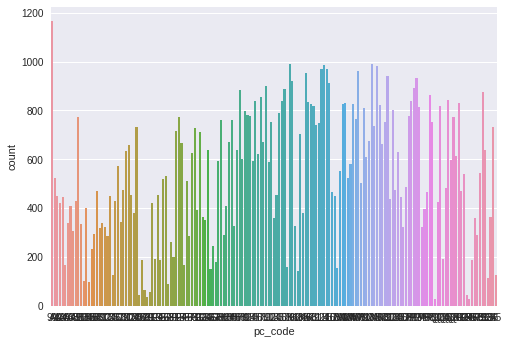

In [142]:
sns.countplot(x='pc_code', data=data)

In [161]:
pc_count = data.groupby(['pc_code', 'pc_description'])['pc_code'].count()\
    .sort_values(ascending=False)
print pc_count

pc_code  pc_description                
99       Other Commodities                 1166
N4       Electric Machinery And Equipme     992
J9       Paper, Paper Board And Product     991
L4       Products Of Iron And Steel         986
N6       Indl. Machnry For Dairy Etc        982
L5       Aluminium, Products Of Aluminm     970
L3       Iron And Steel                     969
M8       Medical And Scientific Instrum     962
K6       Moulded And Extruded Goods         952
O1       Other Misc. Engineering Items      943
P3       Electronics Instruments            932
K1       Plywood And Allied Products        919
L6       Copper And Prdcts Made Of Copr     912
I9       Othr Rubber Prodct Excpt Footw     900
P2       Electronics Components             890
J7       Books, Publications And Prntng     889
H8       Drug Formulations, Biologicals     885
S1       Handcrfs(Excl.Handmade Crpts)      874
P8       Cotton Fabrics, Madeups Etc.       864
I7       Residul Chemicl And Alled Prod     857


*Electric Machinery And Equipme*, *Paper* and *Icon and Steel* are top 3 principal commodity. They might be not the most valuable items.

In [ ]:
def get_first_letter(x):
    print x
    return 

In [184]:
data.groupby(lambda x : x['pc_code'], axis=0).count()

TypeError: 'int' object has no attribute '__getitem__'

In [91]:
print "unit value range is " + str(data['unit'].unique())

unit value range is [None 'Kgs' 'Ton' 'Ltr' 'Nos' 'Sqm']


In [92]:
print "country_code value range is " + str(data['country_code'].unique())

country_code value range is [  599  1213  1395  1417  2035  2050  2057  2067  2069  2087  2141  2199
  2241  2255  2257  2289  2345  2353  2399  2459  3011  3041  3053  3063
  3085  3102  3115  3116  3117  3143  3149  3167  3169  3227  3229  3243
  3249  3267  3269  3291  3339  3349  3355  3357  3363  3371  3385  3461
  4005  4111  4231  4265  4365  4381  4407  4463  5059  5423  6015  6039
  6043  6073  6083  6109  6317  6319  6427  6433  7012  7013  7020  7023
  7029  7031  7105  7159  7171  7203  7373  7375  7379  7405  8091  8113
  8165  8177  8287  9037  9045  9065  9093  9103  9161  9175  9253  9259
  9277  9311  9331  9383  9439 10001 10017 10027 10038 10047 10056 10077
 10089 10127 10179 10187 10189 10205 10214 10217 10223 10245 10252 10256
 10258 10261 10273 10285 10309 10315 10323 10359 10361 10369 10397 10403
 10437 10447 11025 11191 11207 11219 11225 11301 11335 11351 11391 11419
 11453 12075 12133 12163 12195 12215 12239 12247 12281 12329 12401 12431
 13019 13033 13101 1312

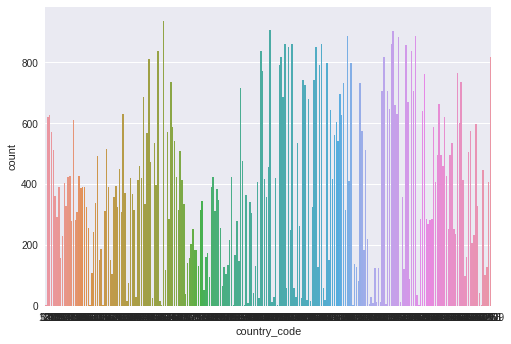

In [144]:
sns.countplot(x='country_code', data=data)

In [74]:
print "country_name value range is " + str(np.sort(data['country_name'].unique()))

country_name value range is ['Afghanistan' 'Albania' 'Algeria' 'Ameri Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antartica' 'Antigua' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Baharain Is' 'Bangladesh Pr' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia-Hrzgovin' 'Botswana' 'Br Virgn Is' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'C Afri Rep' 'Cambodia' 'Cameroon' 'Canada'
 'Canary Is' 'Cape Verde Is' 'Cayman Is' 'Chad' 'Channel Is' 'Chile'
 'China P Rp' 'Christmas Is.' 'Cocos Is' 'Colombia' 'Comoros'
 'Congo D. Rep.' 'Congo P Rep' 'Cook Is' 'Costa Rica' "Cote D' Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti'
 'Dominic Rep' 'Dominica' 'East Timor' 'Ecuador' 'Egypt A Rp' 'El Salvador'
 'Equtl Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Falkland Is' 'Faroe Is.'
 'Fiji Is' 'Finland' 'Fr Guiana' 'Fr Polynesia' 'Fr S Ant Tr' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar

In [162]:
coutry_count = data.groupby(['country_code', 'country_name'])['country_code'].count()\
    .sort_values(ascending=False)
print coutry_count

country_code  country_name                         
5423          U S A                                    936
10077         China P Rp                               908
13147         Germany                                  902
13421         U K                                      888
11419         U Arab Emts                              888
13197         Italy                                    884
10397         Thailand                                 862
13129         France                                   860
10205         Japan                                    860
10245         Malaysia                                 859
13275         Netherland                               856
10217         Korea Rp                                 852
10359         Singapore                                850
10017         Australia                                839
5059          Canada                                   836
13367         Spain                                    836
1018

*value* is numerical

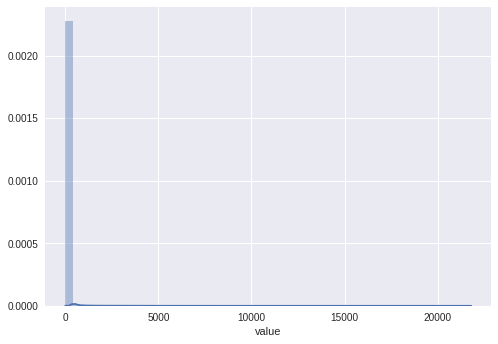

In [90]:
sns.distplot(data['value'])

the distribution of *value* has a long tail. It is better to take a close look.

In [94]:
data['value'].describe()

count    91440.000000
mean        22.539043
std        261.854831
min          0.000000
25%          0.023301
50%          0.301480
75%          3.212839
max      21803.395420
Name: value, dtype: float64

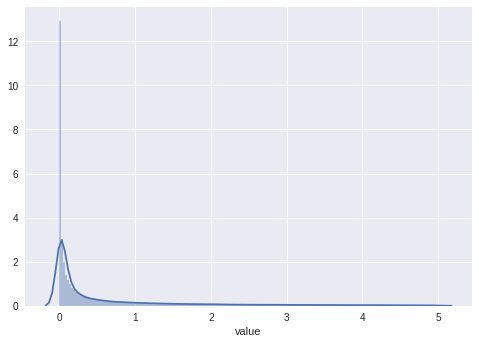

In [101]:
# only for the value less than 5 million USD
sns.distplot(data[data['value'] < 5]['value'], bins=200)

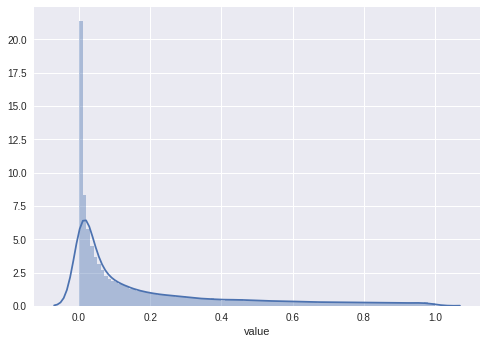

In [121]:
# only for the value less than 1 million USD but greater than 0.1 million
sns.distplot(data[(data['value'] <= 1) & (data['value'] >= 0.001)]['value'], bins=100)

In [112]:
sum(data['value'] == 0)

14

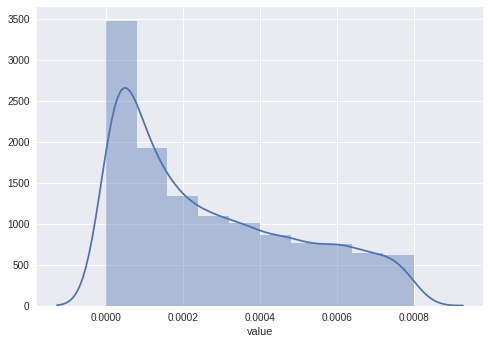

In [124]:
# only for the value less than 0.01 million USD but greater than 0.0 million
sns.distplot(data[(data['value'] <= 0.0008)]['value'], bins=10)

In [123]:
data[(data['value'] <= 0.0005)].sample(n = 5)

,pc_code,pc_description,unit,country_code,country_name,quantity,value,year,trade
19622,R3,Handloom Products,None,3227,Lesotho,NaN,0.000244,2014,Export
46801,H4,Ayush And Herbal Products,Kgs,15356,Montenegro,25.0,0.000122,2016,Export
85814,N7,"Atm, Injctng Mlding Mchnry Etc",None,7263,Montserrat,NaN,0.000121,2015,Export
65535,K4,Optical Items (Incl.Lens Etc),None,8165,Guatemala,NaN,0.000279,2014,Import
14216,N2,Bicycle And Parts,None,3385,Swaziland,NaN,0.000045,2014,Export


In [134]:
print "thera are {} records of 2014".format(data[data['year'] == '2014'].shape[0])
print "thera are {} records of 2015".format(data[data['year'] == '2015'].shape[0])
print "thera are {} records of 2016".format(data[data['year'] == '2016'].shape[0])

thera are 30414 records of 2014
thera are 30488 records of 2015
thera are 30538 records of 2016


In [135]:
print "thera are {} records of export".format(data[data['trade'] == 'Export'].shape[0])
print "thera are {} records of import".format(data[data['trade'] == 'Import'].shape[0])

thera are 62445 records of export
thera are 28995 records of import


Most Principal Commodity value are less than USD(1,000,000 * 0.0001 = 100).

### create a dict of pc_code and pc_description

In [79]:
pc_dict = {x[1]['pc_code'] : x[1]['pc_description'] for x in data.iterrows()}

In [82]:
print "S2 is " + pc_dict["S2"]
print "L5 is " + pc_dict["L5"]

S2 is Carpet(Excl. Silk) Handmade
L5 is Aluminium, Products Of Aluminm


In [171]:
def print_pc_code_family(f):
    print f + " family: "
    print [pc_dict[x] for x in pc_dict.keys() if x.startswith(f)]

In [174]:
import string
t = map(print_pc_code_family, string.ascii_uppercase)

A family: 
['Tea', 'Rice -Basmoti', 'Coffee', 'Wheat', 'Rice(Other Than Basmoti)', 'Pulses', 'Other Cereals', 'Tobacco Manufactured', 'Tobacco Unmanufactured']
B family: 
['Sesame Seeds', 'Niger Seeds', 'Groundnut', 'Other Oil Seeds', 'Spices', 'Cashew', 'Cashew Nut Shell Liquid', 'Vegetable Oils', 'Oil Meals']
C family: 
['Processed Vegetables', 'Fresh Vegetables', 'Shellac', 'Castor Oil', 'Guergam Meal', 'Fresh Fruits', 'Fruits / Vegetable Seeds', 'Mollases', 'Sugar']
D family: 
['Sheep/Goat Meat', 'Other Meat', 'Animal Casings', 'Buffalo Meat', 'Milled Products', 'Misc Processed Items', 'Cereal Preparations', 'Cocoa Products', 'Processed Fruits And Juices']
E family: 
['Mica', 'Iron Ore', 'Natural Rubber', 'Floricltr Products', 'Marine Products', 'Alcoholic Beverages', 'Processed Meat', 'Poultry Products', 'Dairy Products']
F family: 
['Coal,Coke And Briquittes Etc', 'Bulk Minerals And Ores', 'Granit, Natrl Stone And Prodct', 'Processed Minerals', 'Sulpher, Unroasted Iron Pyrite', '

### create a dict of country_name and coutry_code

In [80]:
country_dict = {x[1]['country_code'] : x[1]['country_name'] for x in data.iterrows()}

In [81]:
print "13421 is " + country_dict[13421]
print "4381 is " + country_dict[4381]

13421 is U K
4381 is Sudan


### Multivariate